## introduction

In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import gym

print(gym.__version__)

0.12.1


https://gym.openai.com/envs/

In [2]:
all_envs = gym.envs.registry.all()
env_ids = [env.id for env in all_envs]

print(f'There are {len(env_ids)} gym environments. Such as {env_ids[:12]}')

There are 833 gym environments. Such as ['Copy-v0', 'RepeatCopy-v0', 'ReversedAddition-v0', 'ReversedAddition3-v0', 'DuplicatedInput-v0', 'Reverse-v0', 'CartPole-v0', 'CartPole-v1', 'MountainCar-v0', 'MountainCarContinuous-v0', 'Pendulum-v0', 'Acrobot-v1']


https://gym.openai.com/envs/CartPole-v1/

## discrete action space environment

In [3]:
env = gym.make('CartPole-v1')

In [4]:
print('observation space is:', env.observation_space)

print('is observation space discrete?', isinstance(env.observation_space, gym.spaces.Discrete))
print('is observation space continuous?', isinstance(env.observation_space, gym.spaces.Box))

print('observation space shape:', env.observation_space.shape)

print('observation space high values?', env.observation_space.high)
print('observation space low values?', env.observation_space.low)

observation space is: Box(4,)
is observation space discrete? False
is observation space continuous? True
observation space shape: (4,)
observation space high values? [4.8000002e+00 3.4028235e+38 4.1887903e-01 3.4028235e+38]
observation space low values? [-4.8000002e+00 -3.4028235e+38 -4.1887903e-01 -3.4028235e+38]


In [5]:
print('action space is:', env.action_space)

print('is action space discrete?', isinstance(env.action_space, gym.spaces.Discrete))
print('is action space continuous?', isinstance(env.action_space, gym.spaces.Box))

print('action space shape:', env.action_space.n)

action space is: Discrete(2)
is action space discrete? True
is action space continuous? False
action space shape: 2


In [6]:
print(env.spec.max_episode_steps)
print(env.spec.reward_threshold)
print(env.spec.trials) #episode done when reward >= reward_threshold for 100 consecutive trials
print(env.spec.nondeterministic)

500
475.0
100
False


## continuous action space environment

In [7]:
env = gym.make('Pendulum-v0')

In [8]:
print('observation space is:', env.observation_space)

print('is observation space discrete?', isinstance(env.observation_space, gym.spaces.Discrete))
print('is observation space continuous?', isinstance(env.observation_space, gym.spaces.Box))

print('observation space shape:', env.observation_space.shape)

print('observation space high values?', env.observation_space.high)
print('observation space low values?', env.observation_space.low)

observation space is: Box(3,)
is observation space discrete? False
is observation space continuous? True
observation space shape: (3,)
observation space high values? [1. 1. 8.]
observation space low values? [-1. -1. -8.]


In [9]:
print('action space is:', env.action_space)

print('is action space discrete?', isinstance(env.action_space, gym.spaces.Discrete))
print('is action space continuous?', isinstance(env.action_space, gym.spaces.Box))

print('action space shape:', env.action_space.shape)

print('action space high values?', env.action_space.high)
print('action space low values?', env.action_space.low)

action space is: Box(1,)
is action space discrete? False
is action space continuous? True
action space shape: (1,)
action space high values? [2.]
action space low values? [-2.]


In [10]:
print(env.spec.max_episode_steps)
print(env.spec.reward_threshold)
print(env.spec.trials) #trials here, but no reward threshold, means you should report best score averaged over 100 trials (https://github.com/openai/gym/wiki/Leaderboard)
print(env.spec.nondeterministic)

200
None
100
False


## atari environments

In [11]:
env = gym.make('Freeway-v4')

In [12]:
print('observation space is:', env.observation_space)
print('is observation space discrete?', isinstance(env.observation_space, gym.spaces.Discrete))
print('is observation space continuous?', isinstance(env.observation_space, gym.spaces.Box))
print('observation space shape:', env.observation_space.shape)

observation space is: Box(210, 160, 3)
is observation space discrete? False
is observation space continuous? True
observation space shape: (210, 160, 3)


In [13]:
print('action space is:', env.action_space)
print('action space shape:', env.action_space.n)
print('is action space discrete?', isinstance(env.action_space, gym.spaces.Discrete))
print('is action space continuous?', isinstance(env.action_space, gym.spaces.Box))
print('action meanings:', env.unwrapped.get_action_meanings())

action space is: Discrete(3)
action space shape: 3
is action space discrete? True
is action space continuous? False
action meanings: ['NOOP', 'UP', 'DOWN']


In [14]:
print(env.spec.max_episode_steps)
print(env.spec.reward_threshold)
print(env.spec.trials) #trials here, but no reward threshold, means you should report best score averaged over 100 trials (https://github.com/openai/gym/wiki/Leaderboard)
print(env.spec.nondeterministic)

100000
None
100
False


- Pong-v0 => 10k steps, randomly skips 2-4 frames, repeat action probability of 25%
- Pong-v4 => 100k steps, randomly skips 2-4 frames
- PongDeterministic-v0 => 100k steps, always skips 4 frames, repeat action probability of 25%
- PongDeterministic-v4 => 100k steps, always skips 4 frames
- PongNoFrameskip-v0 => 100k steps, returns every frame, repeat action probability of 25%
- PongNoFrameskip-v4 => 100k steps, returns every frame

information about environments: https://github.com/openai/gym/blob/master/gym/envs/__init__.py#L604
spaceinvadersdeterministic always skips 3 frames instead of 4: https://github.com/openai/gym/blob/master/gym/envs/__init__.py#L620
default frameskip when one not provided: https://github.com/openai/gym/blob/master/gym/envs/atari/atari_env.py#L30
when skipping frames, you repeat the last action: https://github.com/openai/gym/blob/master/gym/envs/atari/atari_env.py#L94

## wrappers

not exclusive to atari, but most commonly used for atari

commonly used atari wrappers: https://github.com/openai/baselines/blob/master/baselines/common/atari_wrappers.py

In [15]:
class ClipRewardEnv(gym.RewardWrapper):
    def __init__(self, env):
        gym.RewardWrapper.__init__(self, env)

    def reward(self, reward):
        """Bin reward to {+1, 0, -1} by its sign."""
        return np.sign(reward)
    
class ScaledFloatFrame(gym.ObservationWrapper):
    def __init__(self, env):
        gym.ObservationWrapper.__init__(self, env)
        self.observation_space = gym.spaces.Box(low=0, high=1, shape=env.observation_space.shape, dtype=np.float32)

    def observation(self, observation):
        return np.array(observation).astype(np.float32) / 255.0

In [16]:
env = gym.make('Pong-v0')

env = ClipRewardEnv(env)

env = ScaledFloatFrame(env)

## interacting with an environment

In [17]:
env = gym.make('CartPole-v1')

env.seed(1234)

state = env.reset()

print('state type:', type(state))
print('state shape:', state.shape)
print('state:', state)

state type: <class 'numpy.ndarray'>
state shape: (4,)
state: [-0.01315549 -0.04012824  0.04801855 -0.0044493 ]


https://github.com/openai/gym/blob/master/gym/envs/classic_control/cartpole.py#L21

cart pos, cart velocity, pole angle, pole velocity

In [18]:
action = env.action_space.sample() #select random action, uniformly between high and low for continuous

print('selected action:', action)

selected action: 0


https://github.com/openai/gym/blob/master/gym/envs/classic_control/cartpole.py#L29

0 = left, 1 = right

In [19]:
state, reward, done, info = env.step(action) #perform action on environment

print('state:', state)
print('reward:', reward)
print('done:', done)
print('info:', info)

state: [-0.01395805 -0.23590479  0.04792957  0.30298905]
reward: 1.0
done: False
info: {}


## interacting with the atari environment

In [36]:
env = gym.make('FreewayNoFrameskip-v4')

env.seed(1234)

state = env.reset()

print('state type:', type(state))
print('state shape:', state.shape)

state type: <class 'numpy.ndarray'>
state shape: (210, 160, 3)


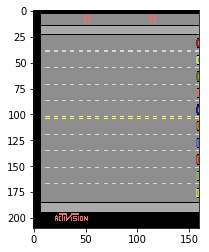

In [37]:
plt.imshow(state);

In [38]:
action = env.action_space.sample() #select random action, uniformly between high and low for continuous

print('selected action:', action)
print('action meaning:', env.unwrapped.get_action_meanings()[action])

selected action: 0
action meaning: NOOP


In [39]:
state, reward, done, info = env.step(action) #perform action on environment

print('reward:', reward)
print('done:', done)
print('info:', info)

reward: 0.0
done: False
info: {'ale.lives': 0}


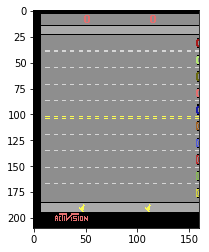

In [40]:
plt.imshow(state);

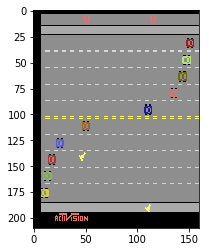

In [41]:
up_action = env.unwrapped.get_action_meanings().index('UP')

for i in range(50):
    state, reward, done, info = env.step(up_action) #presses up 10 times

plt.imshow(state);

## reinforcement learning loop

In [26]:
env = gym.make('SpaceInvadersNoFrameskip-v4')

env.seed(1234)

n_episodes = 10

for episode in range(n_episodes):
    
    episode_reward = 0
    done = False
    state = env.reset()
    
    while not done:
        
        action = env.action_space.sample()
        
        state, reward, done, _ = env.step(action)
        
        episode_reward += reward
        
    print(f'episode: {episode+1}, reward: {episode_reward}')

episode: 1, reward: 50.0
episode: 2, reward: 110.0
episode: 3, reward: 110.0
episode: 4, reward: 90.0
episode: 5, reward: 210.0
episode: 6, reward: 135.0
episode: 7, reward: 210.0
episode: 8, reward: 160.0
episode: 9, reward: 440.0
episode: 10, reward: 120.0
